# Introduction to Pytorch

In machine learning and deep learning, tensors are multi-dimensional arrays with a uniform type (called a dtype). They are similar to NumPy arrays. All tensors are immutable like Python numbers and strings: you can never update the contents of a tensor, only create a new one.

Tensors are multidimensional arrays that can be used on a GPU to accelerate numerical operations and support automatic differentiation. Numpy arrays are ordered lists of numbers that can only be used on a CPU and do not support automatic differentiation.

Automatic differentiation is a technique used to compute the derivatives of a function with respect to its input variables. It is used in machine learning and deep learning to compute gradients for optimization algorithms such as stochastic gradient descent.

In [98]:
import torch

In [99]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype) # default data type is float

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [100]:
z = torch.zeros((5,3), dtype=torch.int16)
print(z)
print(z.dtype)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int16)
torch.int16


In [101]:
torch.manual_seed(17297)
z = torch.rand(5,2)
print(z)

tensor([[0.5189, 0.4580],
        [0.2942, 0.2120],
        [0.1669, 0.5207],
        [0.1118, 0.5372],
        [0.5938, 0.2800]])


In [102]:
a = torch.ones(5,2)
b = torch.ones(5,2) * 3
print(a+b)

tensor([[4., 4.],
        [4., 4.],
        [4., 4.],
        [4., 4.],
        [4., 4.]])


In [103]:
c = torch.ones(5,3)
try: 
    print(a+c) # shapes are different therefore error
except:
    print('The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1v')

    

The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1v


In [104]:
print(torch.max(z))

tensor(0.5938)


## Autograd

#### Loss Function

you can intuitively calculate the loss function because the gradients are calculated while you multiply your weights with the inputs and apply a tanh function to find the output.


In [105]:
x       = torch.randn(1,10)
prev_h  = torch.randn(1,20)
W_h     = torch.randn(20,20)
W_x     = torch.randn(20,10)

i2h = torch.mm(W_x, x.t())
h2h = torch.mm(W_h, prev_h.t())

next_h = i2h + h2h
next_h = next_h.tanh()

loss = next_h.sum()
# loss.backward()

print(loss)

tensor(6.2270)


#### Simple pytorch Model

In [106]:
import torch
import torch.nn as nn
import torch.nn.functional as F # for activation function

##### LeNet-5 model

One of the earliest convolutional NNs. Scans the input and analyzes the hand written images.

- input image is 32x32

- C1: a convolutional layer to extract features from the image and generates a map of where it saw each of its learned features. 6@28x28

- s2: The output of C1 is then downsized. 6@14x14

- C3: is another convolutional layer, looking for combination of features. 16@10x10

- f5: layer of 120n

- f6: layer of 84n

- output: 10n for the 10 digits


here is how to express this nn in pytorch:

<img src="images/lenet5.png">

In [107]:
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

This demonstrates the structure of a typical PyTorch model:
* It inherits from `torch.nn.Module` - modules may be nested - in fact, even the `Conv2d` and `Linear` layer classes inherit from `torch.nn.Module`.
* A model will have an `__init__()` function, where it instantiates its layers, and loads any data artifacts it might need (e.g., an NLP model might load a vocabulary).
* A model will have a `forward()` function. This is where the actual computation happens: An input is passed through the network layers and various functions to generate an output.
* Other than that, you can build out your model class like any other Python class, adding whatever properties and methods you need to support your model's computation.

Let's instantiate this object and run a sample input through it.

In [108]:
net = LeNet()
print(net)                         # what does the object tell us about itself?

input = torch.rand(1, 1, 32, 32)   # stand-in for a 32x32 black & white image
print('\nImage batch shape:')
print(input.shape)

output = net(input)                # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[-0.0456,  0.0107,  0.0164, -0.0700,  0.1095, -0.0199,  0.0120,  0.0640,
         -0.0942,  0.0922]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


### Let's train the NN

In [109]:


import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
# convert the input datasets into tensors and normalize them
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [111]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform);

0.2%

6.7%

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data


In [112]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


/Users/zade/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/zade/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


 ship  bird   dog plane


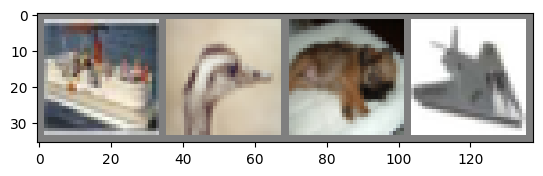

In [113]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Train and calculate loss

In [114]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [115]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [116]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimizea
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

/Users/zade/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/zade/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[1,  2000] loss: 2.232
[1,  4000] loss: 1.845
[1,  6000] loss: 1.698
[1,  8000] loss: 1.589
[1, 10000] loss: 1.509
[1, 12000] loss: 1.467


/Users/zade/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/zade/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[2,  2000] loss: 1.395
[2,  4000] loss: 1.379
[2,  6000] loss: 1.354
[2,  8000] loss: 1.330
[2, 10000] loss: 1.321
[2, 12000] loss: 1.285
Finished Training


In [117]:
# test the model on the data it hasn't been trained on

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

/Users/zade/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/zade/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Accuracy of the network on the 10000 test images: 55 %


## Deployment

- use torchscript to build functions, classes and data structure with python.
- pytorch JIT: torchscript is going to be used by JIT (just in time compiler)

you save and then load the model for production use. this can be used in C++ too.


# Pytorch Tensors

- math and logic
- copying tensors
- moving to gpu
- manipulating tensor shapes
- pytorch-numpy bridge

In [118]:
import torch
import math

In [119]:
x = torch.empty(2,2,3)
print(x.shape)
print(x)

torch.Size([2, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])


In [120]:
# create a new empty tensor with the same size as x
empty_like_x = torch.empty_like(x)
print(empty_like_x.shape)
print(empty_like_x)

torch.Size([2, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])


In [121]:
empty_rand_x = torch.rand_like(x)
print(empty_rand_x.shape)
print(empty_rand_x)

torch.Size([2, 2, 3])
tensor([[[0.1865, 0.9334, 0.0312],
         [0.2435, 0.9302, 0.3645]],

        [[0.5234, 0.1820, 0.2429],
         [0.8434, 0.8645, 0.7145]]])


In [122]:
# torch.tensor creates a copy of data
some_constant = torch.tensor([
    [12,13],
    [100, 200]
])
some_constant

tensor([[ 12,  13],
        [100, 200]])

In [123]:
# convert data type
a = torch.ones(2,3)
print(a.dtype)
c = a.to(torch.int32)
print(c.dtype)

torch.float32
torch.int32


In [124]:
a =     torch.ones(2, 3, 2)
print(a)

b = a * torch.ones(   3, 2) * 2 # 3rd & 2nd dims identical to a, dim 1 absent
print(b)

c = a * torch.ones(   3, 1) * 2 # 3rd dim = 1, 2nd dim identical to a
print(c)

d = a * torch.ones(   1, 2) * 2 # 3rd dim identical to a, 2nd dim = 1
print(d)

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])
tensor([[[2., 2.],
         [2., 2.],
         [2., 2.]],

        [[2., 2.],
         [2., 2.],
         [2., 2.]]])
tensor([[[2., 2.],
         [2., 2.],
         [2., 2.]],

        [[2., 2.],
         [2., 2.],
         [2., 2.]]])
tensor([[[2., 2.],
         [2., 2.],
         [2., 2.]],

        [[2., 2.],
         [2., 2.],
         [2., 2.]]])


In [125]:
# common functions
a = torch.rand(2, 4) * 2 - 1
print('Common functions:')
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

Common functions:
tensor([[0.3714, 0.2766, 0.8346, 0.2991],
        [0.1154, 0.4826, 0.8868, 0.0146]])
tensor([[-0., -0., 1., 1.],
        [-0., -0., -0., -0.]])
tensor([[-1., -1.,  0.,  0.],
        [-1., -1., -1., -1.]])
tensor([[-0.3714, -0.2766,  0.5000,  0.2991],
        [-0.1154, -0.4826, -0.5000, -0.0146]])


In [126]:
# trigonometric functions and their inverses
angles = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
sines = torch.sin(angles)
inverses = torch.asin(sines)
print('\nSine and arcsine:')
print(angles)
print(sines)
print(inverses)


Sine and arcsine:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 0.7854])


In [127]:
# bitwise operations
print('\nBitwise XOR:')
b = torch.tensor([1, 5, 11])
c = torch.tensor([2, 7, 10])
print(torch.bitwise_xor(b, c))


Bitwise XOR:
tensor([3, 2, 1])


In [128]:
# comparisons:
print('\nBroadcasted, element-wise equality comparison:')
d = torch.tensor([[1., 2.], [3., 4.]])
e = torch.ones(1, 2)  # many comparison ops support broadcasting!
print(torch.eq(d, e)) # returns a tensor of type bool


Broadcasted, element-wise equality comparison:
tensor([[ True, False],
        [False, False]])


In [129]:
# reductions:
print('\nReduction ops:')
print(torch.max(d))        # returns a single-element tensor
print(torch.max(d).item()) # extracts the value from the returned tensor
print(torch.mean(d))       # average
print(torch.std(d))        # standard deviation
print(torch.prod(d))       # product of all numbers
print(torch.unique(torch.tensor([1, 2, 1, 2, 1, 2]))) # filter unique elements


Reduction ops:
tensor(4.)
4.0
tensor(2.5000)
tensor(1.2910)
tensor(24.)
tensor([1, 2])


In [130]:
# vector and linear algebra operations
v1 = torch.tensor([1., 0., 0.])         # x unit vector
v2 = torch.tensor([0., 1., 0.])         # y unit vector
m1 = torch.rand(2, 2)                   # random matrix
m2 = torch.tensor([[3., 0.], [0., 3.]]) # three times identity matrix

print('\nVectors & Matrices:')
print(torch.cross(v2, v1)) # negative of z unit vector (v1 x v2 == -v2 x v1)
print(m1)
m3 = torch.matmul(m1, m2)
print(m3)                  # 3 times m1
print(torch.svd(m3))       # singular value decomposition


Vectors & Matrices:
tensor([ 0.,  0., -1.])
tensor([[0.5862, 0.8831],
        [0.0609, 0.7919]])
tensor([[1.7586, 2.6493],
        [0.1828, 2.3756]])
torch.return_types.svd(
U=tensor([[ 0.8117,  0.5840],
        [ 0.5840, -0.8117]]),
S=tensor([3.8563, 0.9578]),
V=tensor([[ 0.3979,  0.9174],
        [ 0.9174, -0.3979]]))


In [131]:
a = torch.rand(2, 2)
b = torch.rand(2, 2)
c = torch.zeros(2, 2)
old_id = id(c)

print(c)
d = torch.matmul(a, b, out=c)
print(c)                # contents of c have changed

assert c is d           # test c & d are same object, not just containing equal values
assert id(c), old_id    # make sure that our new c is the same object as the old one

tensor([[0., 0.],
        [0., 0.]])
tensor([[0.8412, 0.7441],
        [0.5659, 0.5166]])


### Copying Tensors

In [132]:
a = torch.ones(2, 2)
b = a

a[0][1] = 561  # we change a...
print(b)       # ...and b is also altered

tensor([[  1., 561.],
        [  1.,   1.]])


In [133]:
a = torch.ones(2, 2)
b = a.clone()

assert b is not a      # different objects in memory...
print(torch.eq(a, b))  # ...but still with the same contents!

a[0][1] = 561          # a changes...
print(b)               # ...but b is still all ones

tensor([[True, True],
        [True, True]])
tensor([[1., 1.],
        [1., 1.]])


Imagine you're performing a computation in your model's `forward()` function, where gradients are turned on for everything by default, but you want to pull out some values mid-stream to generate some metrics. In this case, you *don't* want the cloned copy of your source tensor to track gradients - performance is improved with autograd's history tracking turned off. For this, you can use the `.detach()` method on the source tensor:

In [134]:
a = torch.rand(2, 2, requires_grad=True) # turn on autograd
print(a)

b = a.clone()
print(b)

c = a.detach().clone()
print(c)

print(a)

tensor([[0.2851, 0.2596],
        [0.9976, 0.9770]], requires_grad=True)
tensor([[0.2851, 0.2596],
        [0.9976, 0.9770]], grad_fn=<CloneBackward0>)
tensor([[0.2851, 0.2596],
        [0.9976, 0.9770]])
tensor([[0.2851, 0.2596],
        [0.9976, 0.9770]], requires_grad=True)


## Moving to GPU

In [135]:
# first check if you have a GPU
if torch.cuda.is_available():
    print('We have a GPU!')
else:
    print('No GPU found; CPU only')

No GPU found; CPU only


In [136]:
if torch.cuda.is_available():
    gpu_rand = torch.rand(2, 2, device='cuda')
    print(gpu_rand)
else:
    print('Sorry, CPU only.')

Sorry, CPU only.


In [137]:
if torch.cuda.is_available():
    my_device = torch.device('cuda')
else:
    my_device = torch.device('cpu')
print('Device: {}'.format(my_device))

x = torch.rand(2, 2, device=my_device)
print(x)

Device: cpu
tensor([[0.0690, 0.9839],
        [0.7347, 0.3909]])


In [138]:
# move a tensor to another device
y = torch.rand(2, 2)
y = y.to(my_device)

## Manipulating Tensor Shapes

One case where you might need to change the number of dimensions is passing a single instance of input to your model. PyTorch models generally expect *batches* of input.

For example, imagine having a model that works on 3 x 226 x 226 images - a 226-pixel square with 3 color channels. When you load and transform it, you'll get a tensor of shape `(3, 226, 226)`. Your model, though, is expecting input of shape `(N, 3, 226, 226)`, where `N` is the number of images in the batch. So how do you make a batch of one?

In [139]:
a = torch.rand(3, 226, 226)
b = a.unsqueeze(0)

print(a.shape)
print(b.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


The `unsqueeze()` method adds a dimension of extent 1. `unsqueeze(0)` adds it as a new zeroth dimension - now you have a batch of one!

So if that's *un*squeezing? What do we mean by squeezing? We're taking advantage of the fact that any dimension of extent 1 *does not* change the number of elements in the tensor.

In [140]:
a = torch.rand(1, 20)
print(a.shape)
# print(a)

b = a.squeeze(0)
print(b.shape)
# print(b)

c = torch.rand(2, 2)
print(c.shape)

d = c.squeeze(0)
print(d.shape) # only changes for the dimensions of extent 1

torch.Size([1, 20])
torch.Size([20])
torch.Size([2, 2])
torch.Size([2, 2])


In [141]:
a = torch.ones(4, 3, 2)
b = torch.rand(   3)     # trying to multiply a * b will give a runtime error
c = b.unsqueeze(1)       # change to a 2-dimensional tensor, adding new dim at the end
print(c.shape)
print(a * c)             # broadcasting works again!

torch.Size([3, 1])
tensor([[[0.1306, 0.1306],
         [0.7423, 0.7423],
         [0.8285, 0.8285]],

        [[0.1306, 0.1306],
         [0.7423, 0.7423],
         [0.8285, 0.8285]],

        [[0.1306, 0.1306],
         [0.7423, 0.7423],
         [0.8285, 0.8285]],

        [[0.1306, 0.1306],
         [0.7423, 0.7423],
         [0.8285, 0.8285]]])


Sometimes you'll want to change the shape of a tensor more radically, while still preserving the number of elements and their contents. One case where this happens is at the interface between a convolutional layer of a model and a linear layer of the model - this is common in image classification models. A convolution kernel will yield an output tensor of shape *features x width x height,* but the following linear layer expects a 1-dimensional input. `reshape()` will do this for you, provided that the dimensions you request yield the same number of elements as the input tensor has:

In [142]:
output3d = torch.rand(6, 20, 20)
print(output3d.shape)

input1d = output3d.reshape(6 * 20 * 20)
print(input1d.shape)

# can also call it as a method on the torch module:
print(torch.reshape(output3d, (6 * 20 * 20,)).shape)

torch.Size([6, 20, 20])
torch.Size([2400])
torch.Size([2400])


## Numpy bridge

If you have existing ML or scientific code with data stored in NumPy ndarrays, you may wish to express that same data as PyTorch tensors, whether to take advantage of PyTorch's GPU acceleration, or its efficient abstractions for building ML models. It's easy to switch between ndarrays and PyTorch tensors:

In [143]:
import numpy as np

numpy_array = np.ones((2, 3))
print(numpy_array)

pytorch_tensor = torch.from_numpy(numpy_array)
print(pytorch_tensor)

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


The conversion can just as easily go the other way:

In [144]:
pytorch_rand = torch.rand(2, 3)
print(pytorch_rand)

numpy_rand = pytorch_rand.numpy()
print(numpy_rand)

tensor([[0.7825, 0.7071, 0.7717],
        [0.1704, 0.4550, 0.8205]])
[[0.78248334 0.70713633 0.77170706]
 [0.17042696 0.4550026  0.82054037]]


## Autograd

PyTorch's *Autograd* feature is part of what make PyTorch flexible and fast for building machine learning projects. It allows for the rapid and easy computation of multiple partial derivatives (also referred to as *gradients)* over a complex computation. This operation is central to backpropagation-based neural network learning.

The power of autograd comes from the fact that it traces your computation dynamically *at runtime,* meaning that if your model has decision branches, or loops whose lengths are not known until runtime, the computation will still be traced correctly, and you'll get correct gradients to drive learning. This, combined with the fact that your models are built in Python, offers far more flexibility than frameworks that rely on static analysis of a more rigidly-structured model for computing gradients.

In [1]:
%matplotlib inline
import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

Next, we'll create an input tensor full of evenly spaced values on the interval $[0, 2{\pi}]$, and specify `requires_grad=True`. (Like most functions that create tensors, `torch.linspace()` accepts an optional `requires_grad` option.) Setting this flag means that in every computation that follows, autograd will be accumulating the history of the computation in the output tensors of that computation.

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)
tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -4.7684e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,

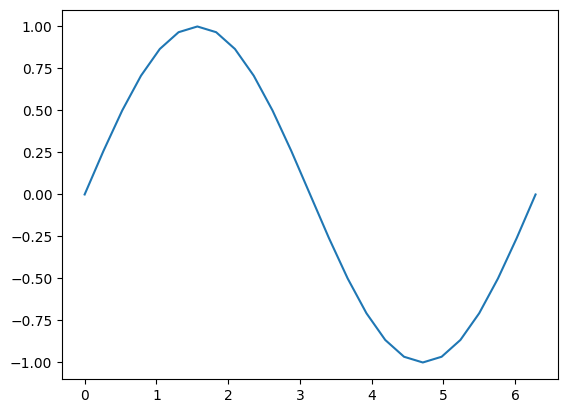

In [3]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)
# Next, we'll perform a computation, and plot its output in terms of its inputs:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

c = 2 * b
print(c)

d = c + 1
print(d)

Finally, let's compute a single-element output. When you call `.backward()` on a tensor with no arguments, it expects the calling tensor to contain only a single element, as is the case when computing a loss function.

In [4]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


Each `grad_fn` stored with our tensors allows you to walk the computation all the way back to its inputs with its `next_functions` property. We can see below that drilling down on this property on `d` shows us the gradient functions for all the prior tensors. Note that `a.grad_fn` is reported as `None`, indicating that this was an input to the function with no history of its own.

In [5]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x1208ea8e0>, 0), (None, 0))
((<SinBackward0 object at 0x1208ea760>, 0), (None, 0))
((<AccumulateGrad object at 0x1208ea7f0>, 0),)
()

c:

b:

a:
None


You call the `backward()` method on the output, and check the input's `grad` property to inspect the gradients:

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


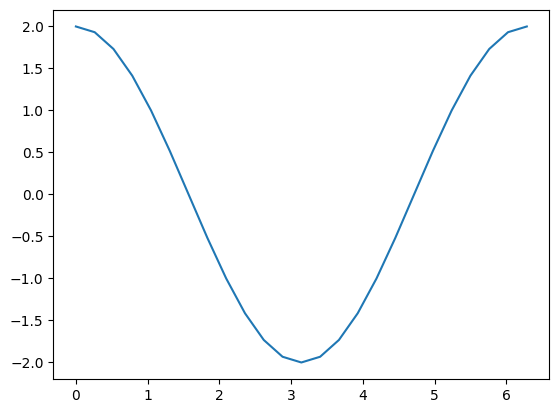

In [6]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

Recall the computation steps we took to get here:

```
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
b = torch.sin(a)
c = 2 * b
d = c + 1
out = d.sum()
```

Adding a constant, as we did to compute `d`, does not change the derivative. That leaves $c = 2 * b = 2 * sin(a)$, the derivative of which should be $2 * cos(a)$. Looking at the graph above, that's just what we see.

Be aware than only *leaf nodes* of the computation have their gradients computed. If you tried, for example, `print(c.grad)` you'd get back `None`. In this simple example, only the input is a leaf node, so only it has gradients computed.

#### Autograd Profiler

Autograd tracks every step of your computation in detail. Such a computation history, combined with timing information, would make a handy profiler - and autograd has that feature baked in. Here's a quick example usage:

In [7]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True
    
x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(1000):
        z = (z / x) * y
        
print(prf.key_averages().table(sort_by='self_cpu_time_total'))

STAGE:2023-07-11 14:51:51 74775:3401665 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-11 14:51:51 74775:3401665 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-11 14:51:51 74775:3401665 ActivityProfilerController.cpp:321] Completed Stage: Post Processing


-------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::div        54.50%       6.147ms        54.50%       6.147ms       6.147us          1000  
    aten::mul        45.50%       5.131ms        45.50%       5.131ms       5.131us          1000  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 11.278ms

